In [2]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#Upload from csv
data_set_path = "school_attendance.csv"

#Read data and results
data_set_df = pd.read_csv(data_set_path)

data_set_df.head()

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Filter
all_df = data_set_df.loc[(data_set_df["District name"]=="Connecticut")]
#Reduce
all_reduced_df = all_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_reduced_df


,District name,Student group,2021-2022 student count - year to date
0,Connecticut,All Students,500285
1,Connecticut,Students Experiencing Homelessness,1814
2,Connecticut,Students With Disabilities,78417
3,Connecticut,Free Meal Eligible,168984
4,Connecticut,Reduced Price Meal Eligible,29905
5,Connecticut,Free/Reduced Price Meal Eligible,198889
6,Connecticut,English Learners,43571
7,Connecticut,All other races,48700
8,Connecticut,Black or African American,63099
9,Connecticut,Hispanic/Latino of any race,146298


In [4]:
#Make lists
percent_yes=[]
percent_no={}
for i in all_reduced_df["2021-2022 student count - year to date"]:
    percent_yes.append(i)
    
    
percent_yes

[500285,
 1814,
 78417,
 168984,
 29905,
 198889,
 43571,
 48700,
 63099,
 146298,
 242188,
 241106,
 248239]

In [5]:
#Choose all students value
reduced = all_reduced_df.iloc[0][2]
reduced

500285

In [6]:
#Define Variables
reduced = all_reduced_df.iloc[0][2]
disabilities = all_reduced_df.iloc[2][2]
no_disabilities = reduced - disabilities
fr = all_reduced_df.iloc[5][2]
no_fr = reduced - fr
ell = all_reduced_df.iloc[6][2]
no_ell = reduced - ell
black = all_reduced_df.iloc[8][2]
no_black = reduced-black
his = all_reduced_df.iloc[9][2]
no_his = reduced-his
white = all_reduced_df.iloc[10][2]
no_white = reduced - white
no_needs = all_reduced_df.iloc[11][2]
needs = reduced - no_needs

#Find Percents and Define as variables
disabilities_percent = disabilities/reduced+100
no_disabilities_percent = 100-disabilities_percent
fr_percent = fr/reduced*100
no_fr_percent = 100 - fr_percent
ell_percent = ell/reduced*100
no_ell_percent = 100-ell_percent
black_percent = black/reduced*100
no_black_percent = 100-black_percent
his_percent = his/reduced*100
no_his_percent = 100-his_percent
white_percent = white/reduced*100
no_white_percent = 100-white_percent
needs_percent = needs/reduced*100
no_needs_percent = 100-needs_percent

#Test Print
all_percent = ell_percent+no_ell_percent
print(disabilities, no_ell_percent, all_percent)

78417 91.29076426436932 100.0


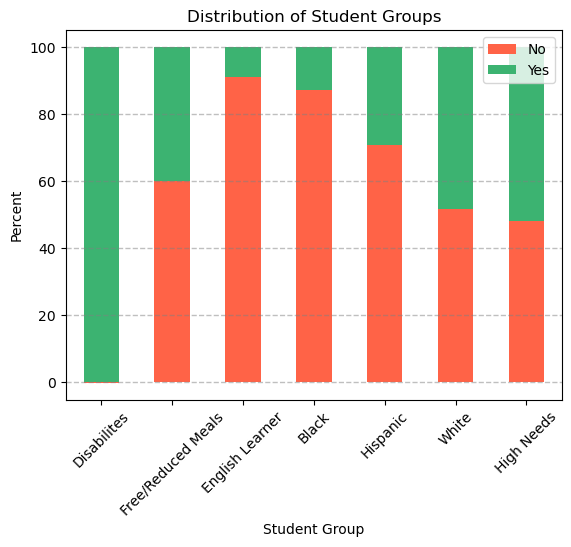

In [7]:
#Stacked Bar Graph
plotdata=pd.DataFrame({
    "No":[no_disabilities_percent, no_fr_percent, no_ell_percent, no_black_percent, 
          no_his_percent, no_white_percent, no_needs_percent],
    "Yes":[disabilities_percent, fr_percent, ell_percent, black_percent, his_percent, 
           white_percent, needs_percent]
        
    },
    index = ["Disabilites", "Free/Reduced Meals", "English Learner", "Black", "Hispanic", 
             "White", "High Needs"])
plotdata.plot(rot=45, kind="bar", stacked = True, color={"No" : "tomato", "Yes": 
                                                         "mediumseagreen"})
plt.title("Distribution of Student Groups")
plt.xlabel("Student Group")
plt.ylabel("Percent")
plt.grid(color="gray", linestyle="--", linewidth=1, axis="y", alpha=0.5)

#Save image
plt.savefig("Images/StackedBar.png", bbox_inches="tight")

#Plot
plt.show()

In [8]:
#Pie Chart ELL
#all_reduced_df.drop(0)

In [9]:
#Pie Chart Disabilities
#Recall data frame
all_reduced_df

#Remove All students row
all_reduced_df.drop(0)

#Add rows to find amount not
all_students = all_reduced_df.iloc[0][2]
dis = all_reduced_df.iloc[2][2]
not_dis = all_students - dis

#Add row to data frame
all_reduced_df.loc[len(all_reduced_df.index)] = ["Connecticut", "No Disabilities", not_dis]



In [10]:
#Filter Disabilities and No Disabilities
dis_df = all_reduced_df.loc[(all_reduced_df["Student group"]=="Students With Disabilities") |
                            (all_reduced_df["Student group"]=="No Disabilities")]

#Drop extra added rows, index change every time code runs
#dis_df_1 = dis_df.drop([14])

dis_df

,District name,Student group,2021-2022 student count - year to date
2,Connecticut,Students With Disabilities,78417
13,Connecticut,No Disabilities,421868


In [11]:
#Make lists for pie chart
dis_group = []
dis_count = []

#For loop to append to lists - if rows were duplicated above, deleted and called dis_df_1
for item in dis_df["2021-2022 student count - year to date"]:
    dis_count.append(item)
for group in dis_df["Student group"]:
    dis_group.append(group)
    
#Preview
dis_count

[78417, 421868]

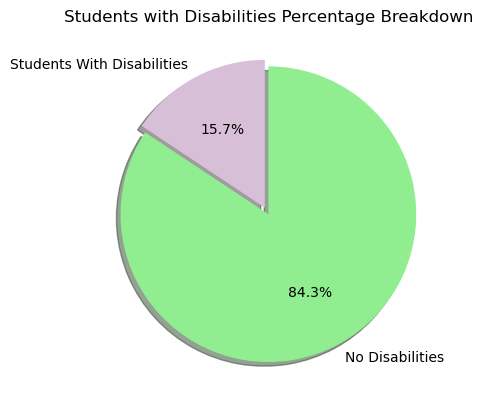

In [12]:
#Disabilities Piechart

#Labels
labels = dis_group

#Values
values = dis_count

#Colors
colors = ["thistle", "lightgreen"]

#Explode
explode = (0.05, 0)

#Plot with percents
fig1, ax1 = plt.subplots()
_, _, autopcts = ax1.pie(values,explode= explode, labels=labels, autopct='%1.1f%%',
        shadow=True,startangle=90, colors=colors)



plt.title("Students with Disabilities Percentage Breakdown")

plt.savefig("Images/DisPie.png", bbox_inches="tight")

plt.show()

In [13]:
# ELL Pie chart
#Recall data frame
all_reduced_df

#Remove All students row
all_reduced_df.drop(0)

#Add rows to find amount not
all_students = all_reduced_df.iloc[0][2]
ell = all_reduced_df.iloc[6][2]
not_ell = all_students - ell

#Add row to data frame
all_reduced_df.loc[len(all_reduced_df.index)] = ["Connecticut", "Not English Learner", not_ell]

not_ell

456714

In [15]:
#Filter ELL and Not ELL
ell_df = all_reduced_df.loc[(all_reduced_df["Student group"]=="English Learners") |
                            (all_reduced_df["Student group"]=="Not English Learner")]



ell_df

,District name,Student group,2021-2022 student count - year to date
6,Connecticut,English Learners,43571
14,Connecticut,Not English Learner,456714


In [16]:
#Make lists for pie chart
ell_group = []
ell_count = []

#For loop to append to lists
for item in ell_df["2021-2022 student count - year to date"]:
    ell_count.append(item)
for group in ell_df["Student group"]:
    ell_group.append(group)
    
#Preview
ell_count

[43571, 456714]

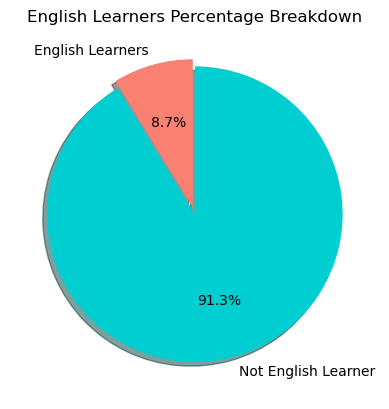

In [18]:
#ELL Piechart

#Labels
labels = ell_group

#Values
values = ell_count

#Colors
colors = ["salmon", "darkturquoise"]

#Explode
explode = (0.05, 0)

#Plot with percents
fig1, ax1 = plt.subplots()
_, _, autopcts = ax1.pie(values,explode= explode, labels=labels, autopct='%1.1f%%',
        shadow=True,startangle=90, colors=colors)



plt.title("English Learners Percentage Breakdown")

plt.savefig("Images/ELLPie.png", bbox_inches="tight")

plt.show()

In [19]:
#Reduce to race
race_df = all_reduced_df.loc[(all_reduced_df["Student group"]=="All other races") |
                            (all_reduced_df["Student group"]=="Black or African American") |
                             (all_reduced_df["Student group"]=="Hispanic/Latino of any race") |
                             (all_reduced_df["Student group"]=="White")]

race_df

,District name,Student group,2021-2022 student count - year to date
7,Connecticut,All other races,48700
8,Connecticut,Black or African American,63099
9,Connecticut,Hispanic/Latino of any race,146298
10,Connecticut,White,242188


In [20]:
#Make lists for pie chart
student_group = []
student_count = []

#For loop to append to lists
for item in race_df["2021-2022 student count - year to date"]:
    student_count.append(item)
for group in race_df["Student group"]:
    student_group.append(group)
    
#Preview
student_count

[48700, 63099, 146298, 242188]

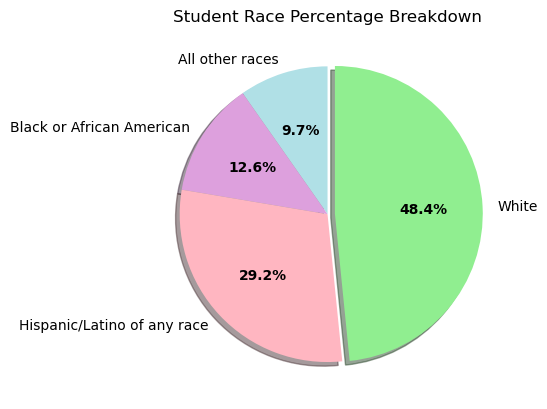

In [21]:
#Races Piechart

#Labels
labels = student_group

#Values
values = student_count

#Colors
colors = ["powderblue", "plum", "lightpink", "lightgreen"]

#Explode
explode = (0, 0, 0, 0.05)

#Plot with percents
fig1, ax1 = plt.subplots()
_, _, autopcts = ax1.pie(values,explode= explode, labels=labels, autopct='%1.1f%%',
        shadow=True,startangle=90, colors=colors)
plt.setp(autopcts, color='black', fontweight='bold')

plt.title("Student Race Percentage Breakdown")

plt.savefig("Images/RacesPie.png", bbox_inches="tight")

plt.show()

In [22]:
#High Needs Pieplot
#Recall data set
all_reduced_df

#Reduce to race
needs_df = all_reduced_df.loc[(all_reduced_df["Student group"]=="Students With High Needs") |
                            (all_reduced_df["Student group"]=="Students Without High Needs")]

needs_df

,District name,Student group,2021-2022 student count - year to date
11,Connecticut,Students Without High Needs,241106
12,Connecticut,Students With High Needs,248239


In [23]:
#Make lists for pie chart
student_group_needs = []
student_count_needs = []

#For loop to append to lists
for item in needs_df["2021-2022 student count - year to date"]:
    student_count_needs.append(item)
for group in needs_df["Student group"]:
    student_group_needs.append(group)
    

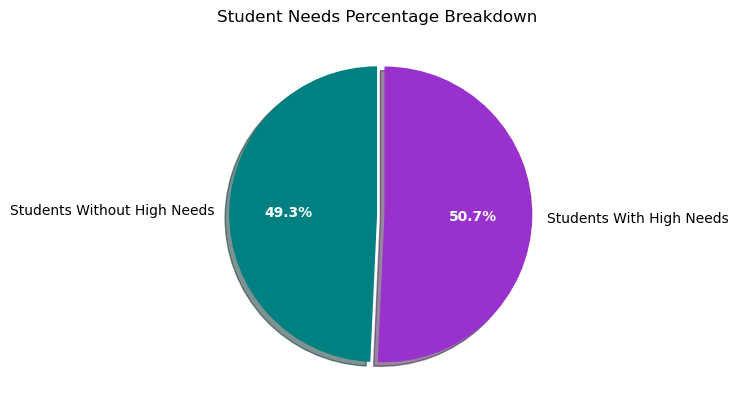

In [24]:
#Need Piechart

#Labels
labels = student_group_needs

#Values
values = student_count_needs

#Colors
colors = ["teal", "darkorchid"]

#Explode
explode = (0, 0.05)

#Plot with percents
fig1, ax1 = plt.subplots()
_, _, autopcts = ax1.pie(values,explode= explode, labels=labels, autopct='%1.1f%%',
        shadow=True,startangle=90, colors=colors)
plt.setp(autopcts, color='white', fontweight='bold')


plt.title("Student Needs Percentage Breakdown")

plt.savefig("Images/NeedsPie.png", bbox_inches="tight")

plt.show()

In [25]:
#FR Breakdown Pieplot

#Add rows to find amount not
all_students = all_reduced_df.iloc[0][2]
fr = all_reduced_df.iloc[5][2]
not_fr = all_students - fr

#Add row to data frame
all_reduced_df.loc[len(all_reduced_df.index)] = ["Connecticut", "Not Free/Reduced Price Meal Eligible", not_fr]


In [26]:
#Reduce Data Frame
fr_reduced_df = all_reduced_df.loc[(all_reduced_df["Student group"]=="Free/Reduced Price Meal Eligible") |
                                  (all_reduced_df["Student group"]=="Not Free/Reduced Price Meal Eligible")]

#Remove extra rows if added
#fr_reduced_df_1 = fr_reduced_df.drop(index=[14, 15, 16, 17])

fr_reduced_df

,District name,Student group,2021-2022 student count - year to date
5,Connecticut,Free/Reduced Price Meal Eligible,198889
15,Connecticut,Not Free/Reduced Price Meal Eligible,301396


In [27]:
#Make lists for pie chart
student_group_fr = []
student_count_fr = []

#For loop to append to lists
for item in fr_reduced_df["2021-2022 student count - year to date"]:
    student_count_fr.append(item)
for group in fr_reduced_df["Student group"]:
    student_group_fr.append(group)
    

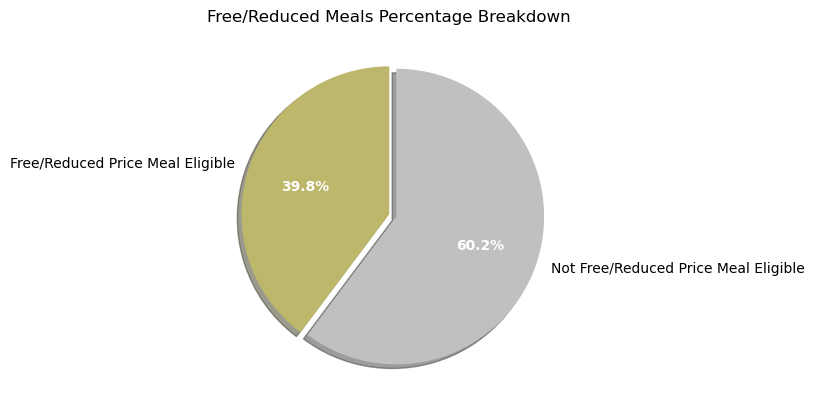

In [28]:
#Need Piechart

#Labels
labels = student_group_fr

#Values
values = student_count_fr

#Colors
colors = ["darkkhaki", "silver"]

#Explode
explode = (0, 0.05)

#Plot with percents
fig1, ax1 = plt.subplots()
_, _, autopcts = ax1.pie(values,explode= explode, labels=labels, autopct='%1.1f%%',
        shadow=True,startangle=90, colors=colors)
plt.setp(autopcts, color='white', fontweight='bold')

#plt.pie(values, explode=explode, labels=labels, colors=colors,
      # autopct="%1.1f%%", shadow=True, startangle=90)
#plt.legend(labels, loc="lower right")
plt.title("Free/Reduced Meals Percentage Breakdown")

plt.savefig("Images/FRPie.png", bbox_inches="tight")

plt.show()

In [29]:
#Filter by Student group
all_students_df = data_set_df.loc[data_set_df["Student group"] == "All Students"]
all_students_df = all_students_df.drop(0)
all_students_df

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
13,0010011,Andover School District,NaN,All Students,161,0.9386,144.0,0.9680,158.0,0.9502,June 2022,07/22/2022
19,0020011,Ansonia School District,NaN,All Students,2139,0.9045,2153.0,0.8923,2185.0,0.9413,June 2022,07/22/2022
31,0030011,Ashford School District,NaN,All Students,343,0.9309,344.0,0.9550,348.0,0.9585,June 2022,07/22/2022
40,0040011,Avon School District,NaN,All Students,3057,0.9457,3093.0,0.9621,3138.0,0.9583,June 2022,07/22/2022
52,0050011,Barkhamsted School District,NaN,All Students,199,0.9305,193.0,0.9698,199.0,0.9573,June 2022,07/22/2022
...,...,...,...,...,...,...,...,...,...,...,...,...
1972,3470015,Unified School District #2,NaN,All Students,78,0.9202,62.0,0.9602,76.0,0.9564,June 2022,07/22/2022
1977,9000016,Connecticut Technical Education and Career System,NaN,All Students,11138,0.8985,11090.0,0.9321,10808.0,0.9480,June 2022,07/22/2022
1990,9010022,Norwich Free Academy District,NaN,All Students,2068,0.8940,2079.0,0.9000,2257.0,0.9319,June 2022,07/22/2022
2002,9020022,The Gilbert School District,NaN,All Students,421,0.8901,445.0,0.9458,470.0,0.9394,June 2022,07/22/2022


In [30]:
#Number of Students by groups
#Find Min and Max
max_count = all_students_df["2021-2022 student count - year to date"].max()
min_count = all_students_df["2021-2022 student count - year to date"].min()

print(f"The maximum count is {max_count} and the minimum count is {min_count}")

The maximum count is 18482 and the minimum count is 44


In [31]:
#Create bins
bins = [40, 1000, 2000, 4000, 6000, 12000, 20000]

#Names for Bins
bin_names = ["0-1,000", "1,001-2,000", "2,001-4,000", "4,001-6,000", "6,001-12,000", "12,001-20,000"]

#Place data into bins
all_students_df["Size Groups"] = pd.cut(all_students_df["2021-2022 student count - year to date"], bins,
                                        labels=bin_names, include_lowest=True)
all_students_df.head()

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update,Size Groups
13,0010011,Andover School District,NaN,All Students,161,0.9386,144.0,0.9680,158.0,0.9502,June 2022,07/22/2022,"0-1,000"
19,0020011,Ansonia School District,NaN,All Students,2139,0.9045,2153.0,0.8923,2185.0,0.9413,June 2022,07/22/2022,"2,001-4,000"
31,0030011,Ashford School District,NaN,All Students,343,0.9309,344.0,0.9550,348.0,0.9585,June 2022,07/22/2022,"0-1,000"
40,0040011,Avon School District,NaN,All Students,3057,0.9457,3093.0,0.9621,3138.0,0.9583,June 2022,07/22/2022,"2,001-4,000"
52,0050011,Barkhamsted School District,NaN,All Students,199,0.9305,193.0,0.9698,199.0,0.9573,June 2022,07/22/2022,"0-1,000"


In [41]:
#Count Data in bins
bin_counts = all_students_df["Size Groups"].value_counts()
bin_counts_1 = bin_counts.sort_index()
bin_counts_1

Size Groups
0-1,000          87
1,001-2,000      34
2,001-4,000      40
4,001-6,000      19
6,001-12,000     14
12,001-20,000     6
Name: count, dtype: int64

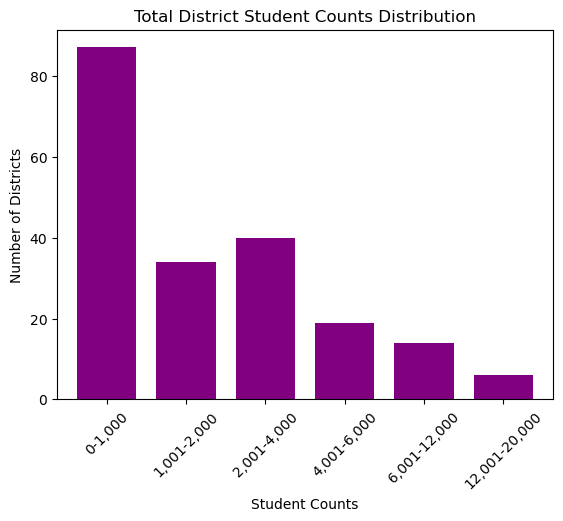

In [42]:
#Bar Graph
bin_counts_1.plot(kind="bar", width=0.75, color = "purple", rot = 45)

#Labels
plt.title("Total District Student Counts Distribution")
plt.xlabel("Student Counts")
plt.ylabel("Number of Districts")

plt.savefig("Images/HisDist.png", bbox_inches = "tight")

plt.show()

In [34]:
data=[]
for number in all_students_df["2021-2022 student count - year to date"]:
    data.append(number)
data

[161,
 2139,
 343,
 3057,
 199,
 2613,
 391,
 3102,
 1734,
 745,
 159,
 2527,
 18482,
 7439,
 2545,
 804,
 77,
 429,
 1462,
 143,
 4119,
 214,
 1493,
 2141,
 75,
 413,
 105,
 1549,
 1873,
 11783,
 4675,
 206,
 1222,
 126,
 839,
 951,
 1713,
 6126,
 2660,
 2597,
 875,
 971,
 2548,
 4660,
 271,
 9229,
 4073,
 157,
 5631,
 1726,
 8471,
 1639,
 4560,
 3108,
 5392,
 63,
 16371,
 129,
 635,
 195,
 2245,
 886,
 2424,
 381,
 808,
 2414,
 6039,
 948,
 445,
 8476,
 4346,
 5204,
 3319,
 1970,
 4208,
 9299,
 4113,
 2096,
 425,
 18028,
 3850,
 3055,
 3601,
 4001,
 68,
 1536,
 218,
 3130,
 740,
 12356,
 3176,
 1014,
 1242,
 1693,
 1860,
 2171,
 1245,
 352,
 1209,
 383,
 1063,
 789,
 4533,
 2483,
 385,
 282,
 86,
 2077,
 99,
 4404,
 247,
 4068,
 1319,
 6171,
 4714,
 248,
 1312,
 15986,
 314,
 1805,
 6724,
 2016,
 795,
 892,
 2200,
 3813,
 6703,
 44,
 3019,
 213,
 5133,
 17806,
 2287,
 2521,
 590,
 9018,
 5863,
 2204,
 5269,
 3578,
 376,
 3734,
 532,
 2960,
 3219,
 1428,
 2121,
 834,
 781,
 335,
 814,

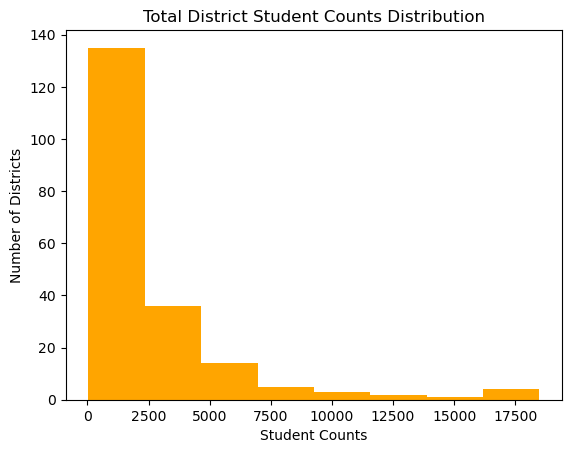

In [44]:
plt.hist(data, color="orange", bins=8)
plt.title("Total District Student Counts Distribution")
plt.xlabel("Student Counts")
plt.ylabel("Number of Districts")
plt.savefig("Images/HisCountRate.png", bbox_inches = "tight")
plt.show()